In [ ]:
#Inputs
t1=6; t2=1.2; k=4; tet=0.25

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpmath import *

def  run_invertlaplace(tt, fp, tet):
    y=np.array([])
    for i in np.arange(0, len(tt)):
        if tt[i] <= tet:
            y = np.append(y,0)
        else:
            y = np.append(y,np.float64(invertlaplace(fp, tt[i], method='talbot')))
    return y 

tmax=20
tt = np.linspace(0, tmax, num=(100 * tmax + 1))
fp = lambda s: (k*exp(-tet*s)/((t1*s+1)*(t2*s+1)))*(1/s)
print(fp(1))

def ft(t):
    f=[]
    for i in np.arange(0, len(t)):
        f.append(1)
    return f

y = run_invertlaplace(tt, fp, tet)
plt.plot(tt, y, 'r', tt, ft(tt),'b')
plt.grid(True)
plt.show()

print(y)

np.save('y_dataset.npy',y)

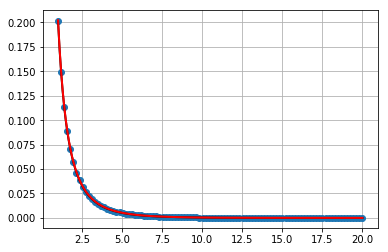

[3.99714542 0.25494987 5.99243734 1.2009093 ]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from mpmath import mp

tmax=20
s = np.linspace(1, 20, num=100)
t = np.linspace(0, tmax, num=(100 * tmax + 1))

xt = np.ones((len(t)))
xs = np.sum(xt[:, np.newaxis] * np.exp(-s * t[:, np.newaxis]) * 0.01, axis = 0)

yt = np.array(np.load('y_dataset.npy'))
ys = np.sum(yt[:, np.newaxis] * np.exp(-s* t[:, np.newaxis]) * 0.01, axis = 0)

hs = ys / xs

def gen_data(s_, k, tet, t1, t2):
    y = k * np.exp(-tet * s_) / ((t1 * s_ + 1) * (t2 * s_ +1))
    return y

def fun(x, s_, hs_):
    return x[0] * np.exp(-x[1] * s_) / ((x[2] * s_ + 1) * (x[3] * s_ +1)) - hs_

x0 = np.ones(4)

from scipy.optimize import least_squares

res_lsq = least_squares(fun, x0, args=(s, hs))

s_test = np.linspace(1, 20, num=200)
hs_lsq = gen_data(s_test, *res_lsq.x)

hs_true = gen_data(s_test, 4, 0.25, 6, 1.2)

plt.plot(s, hs, 'o')
plt.plot(s_test, hs_lsq, 'k', linewidth=2, label='lsq')
plt.plot(s_test, hs_true, 'r', linewidth=2, label='true')
plt.grid(True)
plt.show()

coef = res_lsq.x
print(coef)